In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Germany demand data for 2022, adjust formatting, and convert to GAMS format

In [3]:
demand = pd.read_csv('Data/DE2022_Demand.csv', keep_default_na=True)
demand['datetime'] = pd.date_range(start='2022-01-01 00:00:00', end='2023-01-01 00:45:00', freq='15min')
demand = demand[['datetime', "Actual Total Load [MW] - Germany (DE)"]].set_index('datetime')
demand = demand.resample('H').mean()
demand = demand[:-1]
demand['hour'] = np.arange(1,8761)
demand['hour'] = 'h' + demand['hour'].astype(str)
demand = demand[['hour', 'Actual Total Load [MW] - Germany (DE)']]

demand.to_csv('Germany_demand_2022.tsv',sep='\t', header=False, index=False)

482596637.25


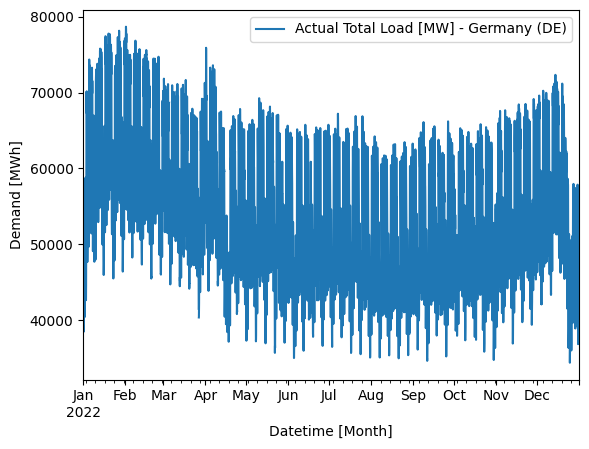

In [4]:
'''Inspecting the German Base Demand for 2022'''
print(demand['Actual Total Load [MW] - Germany (DE)'].sum())

# Plotting demand data
demand.plot(y='Actual Total Load [MW] - Germany (DE)')

# Adding labels to the plot
plt.xlabel('Datetime [Month]')
plt.ylabel('Demand [MWh]')

plt.show()

### Alternative demands: Scale demand according to the scenarios "Harmony Horizon" and "Turbulent Times"
- Harmony Horizon: Increased energy efficiency and savings are expected to lead to a decrease in energy demand. 
- Scaled by a factor of 0.6

- Turbulent Times: Decrease in energy security, less focus on energy saving has led to a increase in demand. 
- Scaled by a factor of 1.1

- Base Scenario: Some energy savings and efficiency measures leads to a decrease in energy consumption of 10%
- Scaled by a factor of 0.9

In [5]:
demand_HH = demand.copy()
demand_HH['Actual Total Load [MW] - Germany (DE)'] = demand_HH['Actual Total Load [MW] - Germany (DE)']*0.6

demand_TT = demand.copy()
demand_TT['Actual Total Load [MW] - Germany (DE)'] = demand_TT['Actual Total Load [MW] - Germany (DE)']*1.1

demand_Base = demand.copy()
demand_Base['Actual Total Load [MW] - Germany (DE)'] = demand_Base['Actual Total Load [MW] - Germany (DE)']*0.9

'''Writing the new demands to tsv-files for GAMS'''
demand_HH.to_csv('Germany_demand_HarmonyHorizon.tsv',sep='\t', header=False, index=False)
demand_TT.to_csv('Germany_demand_TurbulentTimes.tsv',sep='\t', header=False, index=False)
demand_Base.to_csv('Germany_demand_Base.tsv',sep='\t', header=False, index=False)


## Loading Capacity Factors for PV, Wind, from Renewables Ninja, and exporting it to tsv file for GAMS

In [6]:
cap_factors = pd.read_csv('Data/DE_wind_CF.csv', header=2, parse_dates=['time'])
filt = (cap_factors['time'] >= '2019')
cap_factors = cap_factors.loc[filt].reset_index()
cap_factors['newind'] = cap_factors.index + 1
cap_factors['hour'] = 'h' + cap_factors['newind'].astype(str) + '.wind'
cap_factors = cap_factors[['hour', 'DE_TOTAL']]
cap_factors.to_csv('DE_wind_CF_2019.tsv', sep='\t', header=False,index=False)

<AxesSubplot:>

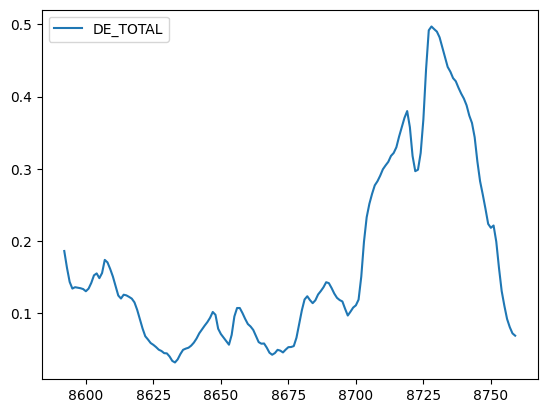

In [7]:
cap_factors[8592:8760].plot(y='DE_TOTAL')

### Doing the same for capacity factors for PV

In [8]:
cap_factors = pd.read_csv('Data/DE_pv_CF.csv', header=2, parse_dates=['time'])
filt = (cap_factors['time'] >= '2019')
cap_factors = cap_factors.loc[filt].reset_index()
cap_factors['newind'] = cap_factors.index + 1
cap_factors['hour'] = 'h' + cap_factors['newind'].astype(str) + '.pv'
cap_factors = cap_factors[['hour', 'DEG0']]
cap_factors.to_csv('DE_PV_CF_2019.tsv', sep='\t', header=False,index=False)

<AxesSubplot:>

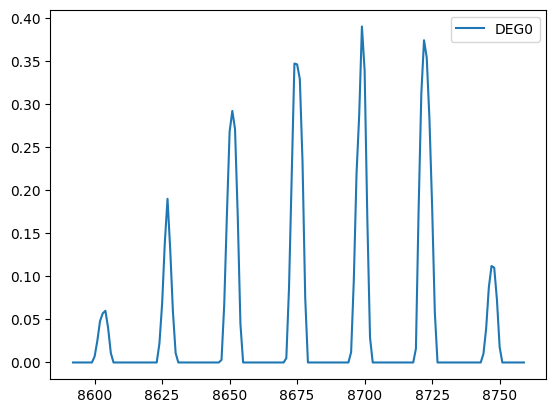

In [9]:
cap_factors[8592:8760].plot(y='DEG0')

### Creating CF data for Gas, Coal, Biomass, Hydro, and Other technologies/storage/excess
- Gas (CCGT): Assumes an average CF of 60% (ranges from 40 to 80)
- Coal: Assumes an average CF of 50% (ranges from 50 to 80)
- Biomass: Assumes an average CF of 60% (ranges from 40 to 80)
- Hydro: Assumes an average CF of 40% (ranges from 40 to 90)
- Other: 100% CF

from: https://www.eia.gov/electricity/monthly/epm_table_grapher.php?t=epmt_6_07_a

In [11]:
'''Gas Capacity Factor'''
DE_Gas_CF = pd.DataFrame()
DE_Gas_CF['hour'] = np.arange(1,8761)
DE_Gas_CF['hour'] = 'h' + DE_Gas_CF['hour'].astype(str) + '.gas'
DE_Gas_CF['capacity factor'] = 0.6
display(DE_Gas_CF)
DE_Gas_CF.to_csv('DE_Gas_CF.tsv', sep='\t', header=False,index=False)

'''Coal Capacity Factor'''
DE_Coal_CF = pd.DataFrame()
DE_Coal_CF['hour'] = np.arange(1,8761)
DE_Coal_CF['hour'] = 'h' + DE_Coal_CF['hour'].astype(str) + '.coal'
DE_Coal_CF['capacity factor'] = 0.5
display(DE_Coal_CF)
DE_Coal_CF.to_csv('DE_Coal_CF.tsv', sep='\t', header=False,index=False)

'''Biomass Capacity Factor'''
DE_Biomass_CF = pd.DataFrame()
DE_Biomass_CF['hour'] = np.arange(1,8761)
DE_Biomass_CF['hour'] = 'h' + DE_Biomass_CF['hour'].astype(str) + '.biomass'
DE_Biomass_CF['capacity factor'] = 0.6
display(DE_Biomass_CF)
DE_Biomass_CF.to_csv('DE_Biomass_CF.tsv', sep='\t', header=False,index=False)

'''Hydro Capacity Factor'''
DE_Hydro_CF = pd.DataFrame()
DE_Hydro_CF['hour'] = np.arange(1,8761)
DE_Hydro_CF['hour'] = 'h' + DE_Hydro_CF['hour'].astype(str) + '.hydro'
DE_Hydro_CF['capacity factor'] = 0.4
display(DE_Hydro_CF)
DE_Hydro_CF.to_csv('DE_Hydro_CF.tsv', sep='\t', header=False,index=False)

'''Perfect Capacity Factor for "Other" technologies, storage, imports/exports '''
DE_Other_CF = pd.DataFrame()
DE_Other_CF['hour'] = np.arange(1,8761)
DE_Other_CF['hour'] = 'h' + DE_Other_CF['hour'].astype(str) + '.other'
DE_Other_CF['capacity factor'] = 1.0
display(DE_Other_CF)
DE_Other_CF.to_csv('DE_Other_CF.tsv', sep='\t', header=False,index=False)

,hour,capacity factor
0,h1.gas,0.6
1,h2.gas,0.6
2,h3.gas,0.6
3,h4.gas,0.6
4,h5.gas,0.6
...,...,...
8755,h8756.gas,0.6
8756,h8757.gas,0.6
8757,h8758.gas,0.6
8758,h8759.gas,0.6


,hour,capacity factor
0,h1.coal,0.5
1,h2.coal,0.5
2,h3.coal,0.5
3,h4.coal,0.5
4,h5.coal,0.5
...,...,...
8755,h8756.coal,0.5
8756,h8757.coal,0.5
8757,h8758.coal,0.5
8758,h8759.coal,0.5


,hour,capacity factor
0,h1.biomass,0.6
1,h2.biomass,0.6
2,h3.biomass,0.6
3,h4.biomass,0.6
4,h5.biomass,0.6
...,...,...
8755,h8756.biomass,0.6
8756,h8757.biomass,0.6
8757,h8758.biomass,0.6
8758,h8759.biomass,0.6


,hour,capacity factor
0,h1.hydro,0.4
1,h2.hydro,0.4
2,h3.hydro,0.4
3,h4.hydro,0.4
4,h5.hydro,0.4
...,...,...
8755,h8756.hydro,0.4
8756,h8757.hydro,0.4
8757,h8758.hydro,0.4
8758,h8759.hydro,0.4


,hour,capacity factor
0,h1.other,1.0
1,h2.other,1.0
2,h3.other,1.0
3,h4.other,1.0
4,h5.other,1.0
...,...,...
8755,h8756.other,1.0
8756,h8757.other,1.0
8757,h8758.other,1.0
8758,h8759.other,1.0


### Creating Scenario-Specific CF for Gas to reflect implications on import/export
- Harmony Horizon: Perfect cross-border trade: CF Gas 1.0
- Turbulent Times: Restricted cross-border trade: CF Gas 0.4
- Base Scenario: BAU: CF Gas 0.8

In [38]:
'''Gas Capacity Factor'''
DE_Gas_CF = pd.DataFrame()
DE_Gas_CF['hour'] = np.arange(1,8761)
DE_Gas_CF['hour'] = 'h' + DE_Gas_CF['hour'].astype(str) + '.gas'

DE_Gas_CF['capacity factor'] = 1.0
DE_Gas_CF.to_csv('DE_Gas_CF_HH.tsv', sep='\t', header=False,index=False)

DE_Gas_CF['capacity factor'] = 0.4
DE_Gas_CF.to_csv('DE_Gas_CF_TT.tsv', sep='\t', header=False,index=False)

DE_Gas_CF['capacity factor'] = 1.0
DE_Gas_CF.to_csv('DE_Gas_CF_Base.tsv', sep='\t', header=False,index=False)

### Base Scenario: Merging CF data to one file

In [39]:
DE_Wind_CF = pd.read_csv('DE_wind_CF_2019.tsv', sep='\t', header=None)
DE_PV_CF = pd.read_csv('DE_PV_CF_2019.tsv', sep='\t', header=None)
DE_Gas_CF_Base = pd.read_csv('DE_Gas_CF_Base.tsv', sep='\t', header=None)
DE_Coal_CF = pd.read_csv('DE_Coal_CF.tsv', sep='\t', header=None)
DE_Biomass_CF = pd.read_csv('DE_Biomass_CF.tsv', sep='\t', header=None)
DE_Hydro_CF = pd.read_csv('DE_Hydro_CF.tsv', sep='\t', header=None)
DE_Other_CF = pd.read_csv('DE_Other_CF.tsv', sep='\t', header=None)

DE_CF = DE_Wind_CF.append([DE_PV_CF,DE_Hydro_CF,DE_Other_CF,DE_Gas_CF_Base, DE_Coal_CF, DE_Biomass_CF], ignore_index=True)
DE_CF.to_csv('Germany_CF_Base.tsv', sep='\t', header=False, index=False)

/var/folders/4c/_1zv66gd4vv9n7t72qtgf0wr0000gn/T/ipykernel_28594/3713979715.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DE_CF = DE_Wind_CF.append([DE_PV_CF,DE_Hydro_CF,DE_Other_CF,DE_Gas_CF_Base, DE_Coal_CF, DE_Biomass_CF], ignore_index=True)


### Harmony Horizon Scenario: Merging CF data to one file

In [18]:
DE_Wind_CF = pd.read_csv('DE_wind_CF_2019.tsv', sep='\t', header=None)
DE_PV_CF = pd.read_csv('DE_PV_CF_2019.tsv', sep='\t', header=None)
DE_Gas_CF_HH = pd.read_csv('DE_Gas_CF_HH.tsv', sep='\t', header=None)
DE_Coal_CF = pd.read_csv('DE_Coal_CF.tsv', sep='\t', header=None)
DE_Biomass_CF = pd.read_csv('DE_Biomass_CF.tsv', sep='\t', header=None)
DE_Hydro_CF = pd.read_csv('DE_Hydro_CF.tsv', sep='\t', header=None)
DE_Other_CF = pd.read_csv('DE_Other_CF.tsv', sep='\t', header=None)

DE_CF = DE_Wind_CF.append([DE_PV_CF,DE_Hydro_CF,DE_Other_CF,DE_Gas_CF_Base, DE_Coal_CF, DE_Biomass_CF], ignore_index=True)
DE_CF.to_csv('Germany_CF_HH.tsv', sep='\t', header=False, index=False)

/var/folders/4c/_1zv66gd4vv9n7t72qtgf0wr0000gn/T/ipykernel_28594/622848083.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DE_CF = DE_Wind_CF.append([DE_PV_CF,DE_Hydro_CF,DE_Other_CF,DE_Gas_CF_Base, DE_Coal_CF, DE_Biomass_CF], ignore_index=True)


### Turbulent Times Scenario: Merging CF data to one file

In [19]:
DE_Wind_CF = pd.read_csv('DE_wind_CF_2019.tsv', sep='\t', header=None)
DE_PV_CF = pd.read_csv('DE_PV_CF_2019.tsv', sep='\t', header=None)
DE_Gas_CF_TT = pd.read_csv('DE_Gas_CF_TT.tsv', sep='\t', header=None)
DE_Coal_CF = pd.read_csv('DE_Coal_CF.tsv', sep='\t', header=None)
DE_Biomass_CF = pd.read_csv('DE_Biomass_CF.tsv', sep='\t', header=None)
DE_Hydro_CF = pd.read_csv('DE_Hydro_CF.tsv', sep='\t', header=None)
DE_Other_CF = pd.read_csv('DE_Other_CF.tsv', sep='\t', header=None)

DE_CF = DE_Wind_CF.append([DE_PV_CF,DE_Hydro_CF,DE_Other_CF,DE_Gas_CF_Base, DE_Coal_CF, DE_Biomass_CF], ignore_index=True)
DE_CF.to_csv('Germany_CF_TT.tsv', sep='\t', header=False, index=False)

/var/folders/4c/_1zv66gd4vv9n7t72qtgf0wr0000gn/T/ipykernel_28594/933431453.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DE_CF = DE_Wind_CF.append([DE_PV_CF,DE_Hydro_CF,DE_Other_CF,DE_Gas_CF_Base, DE_Coal_CF, DE_Biomass_CF], ignore_index=True)
